<a href="https://colab.research.google.com/github/AdiArtifice/AdiArtifice/blob/main/Copy_of_To_train_the_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Tray Detector.v1i.yolov8.zip to Tray Detector.v1i.yolov8.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("Tray Detector.v1i.yolov8.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
!find dataset -maxdepth 2 | sed 's/^/— /'

— dataset
— dataset/test
— dataset/test/images
— dataset/test/labels
— dataset/README.roboflow.txt
— dataset/train
— dataset/train/images
— dataset/train/labels
— dataset/valid
— dataset/valid/images
— dataset/valid/labels
— dataset/README.dataset.txt
— dataset/data.yaml


In [ ]:
!sed -n '1,20p' dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['tray', 'trays']

roboflow:
  workspace: tray-detection-cfllw
  project: tray-detector-1a57m
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/tray-detection-cfllw/tray-detector-1a57m/dataset/1

In [ ]:
!sed -n '1,10p' dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['tray', 'trays']

roboflow:
  workspace: tray-detection-cfllw
  project: tray-detector-1a57m


In [ ]:
!yolo task=detect mode=train \
    model=yolov8n.pt \
    data=dataset/data.yaml \
    epochs=100 \
    patience=10 \
    imgsz=640 \
    batch=16 \
    project=tray_training \
    name=yolov8n_results \
    pretrained=True

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_results, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=True

In [ ]:
# Evaluate on your test split
!yolo task=detect mode=val \
     model=tray_training/yolov8n_results/weights/best.pt \
     data=dataset/data.yaml \
     split=test

Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 18.5±1.3 MB/s, size: 48.9 KB)
val: Scanning /content/dataset/test/labels... 86 images, 2 backgrounds, 0 corrupt: 100% 86/86 [00:00<00:00, 575.45it/s]
val: New cache created: /content/dataset/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:30<00:00,  5.08s/it]
                   all         86        165      0.778      0.808      0.867      0.725
                  tray         84        165      0.778      0.808      0.867      0.725
Speed: 10.8ms preprocess, 329.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!ls runs/detect/val

confusion_matrix_normalized.png  PR_curve.png		val_batch1_labels.jpg
confusion_matrix.png		 R_curve.png		val_batch1_pred.jpg
F1_curve.png			 val_batch0_labels.jpg	val_batch2_labels.jpg
P_curve.png			 val_batch0_pred.jpg	val_batch2_pred.jpg


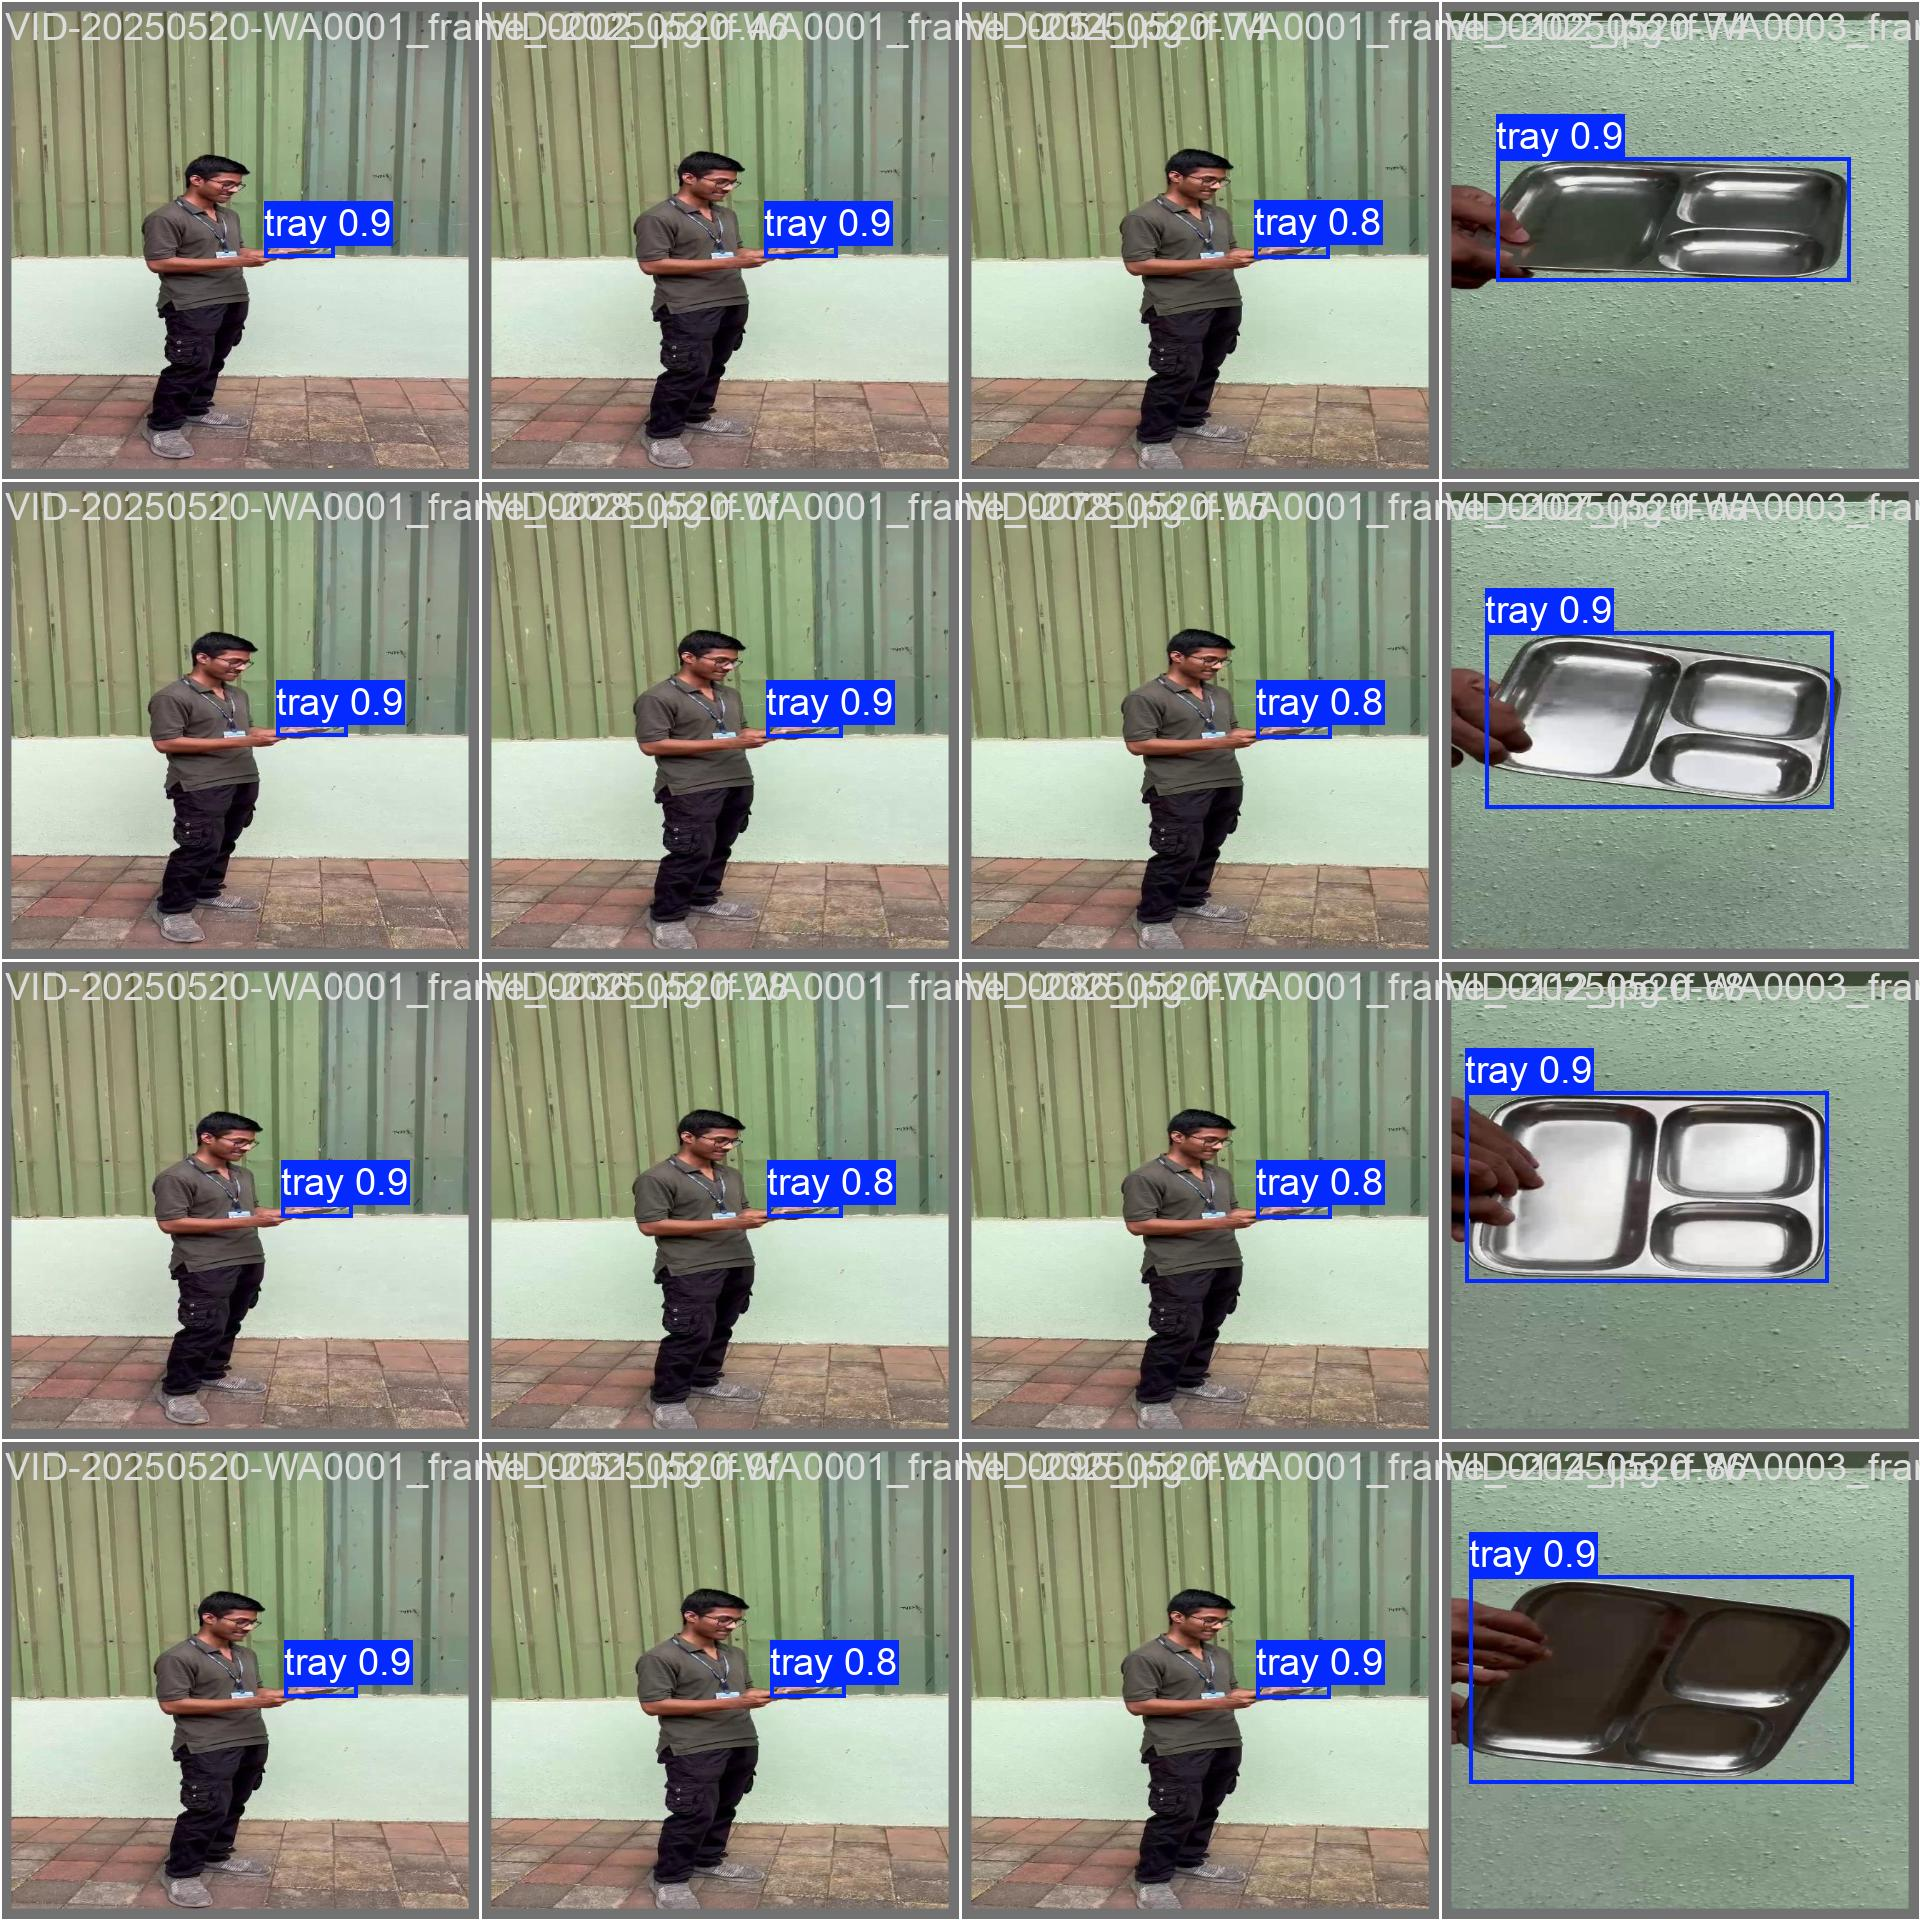

In [ ]:
from IPython.display import Image, display

# Prediction vs. Ground-Truth files
display(Image('runs/detect/val/val_batch0_pred.jpg'))

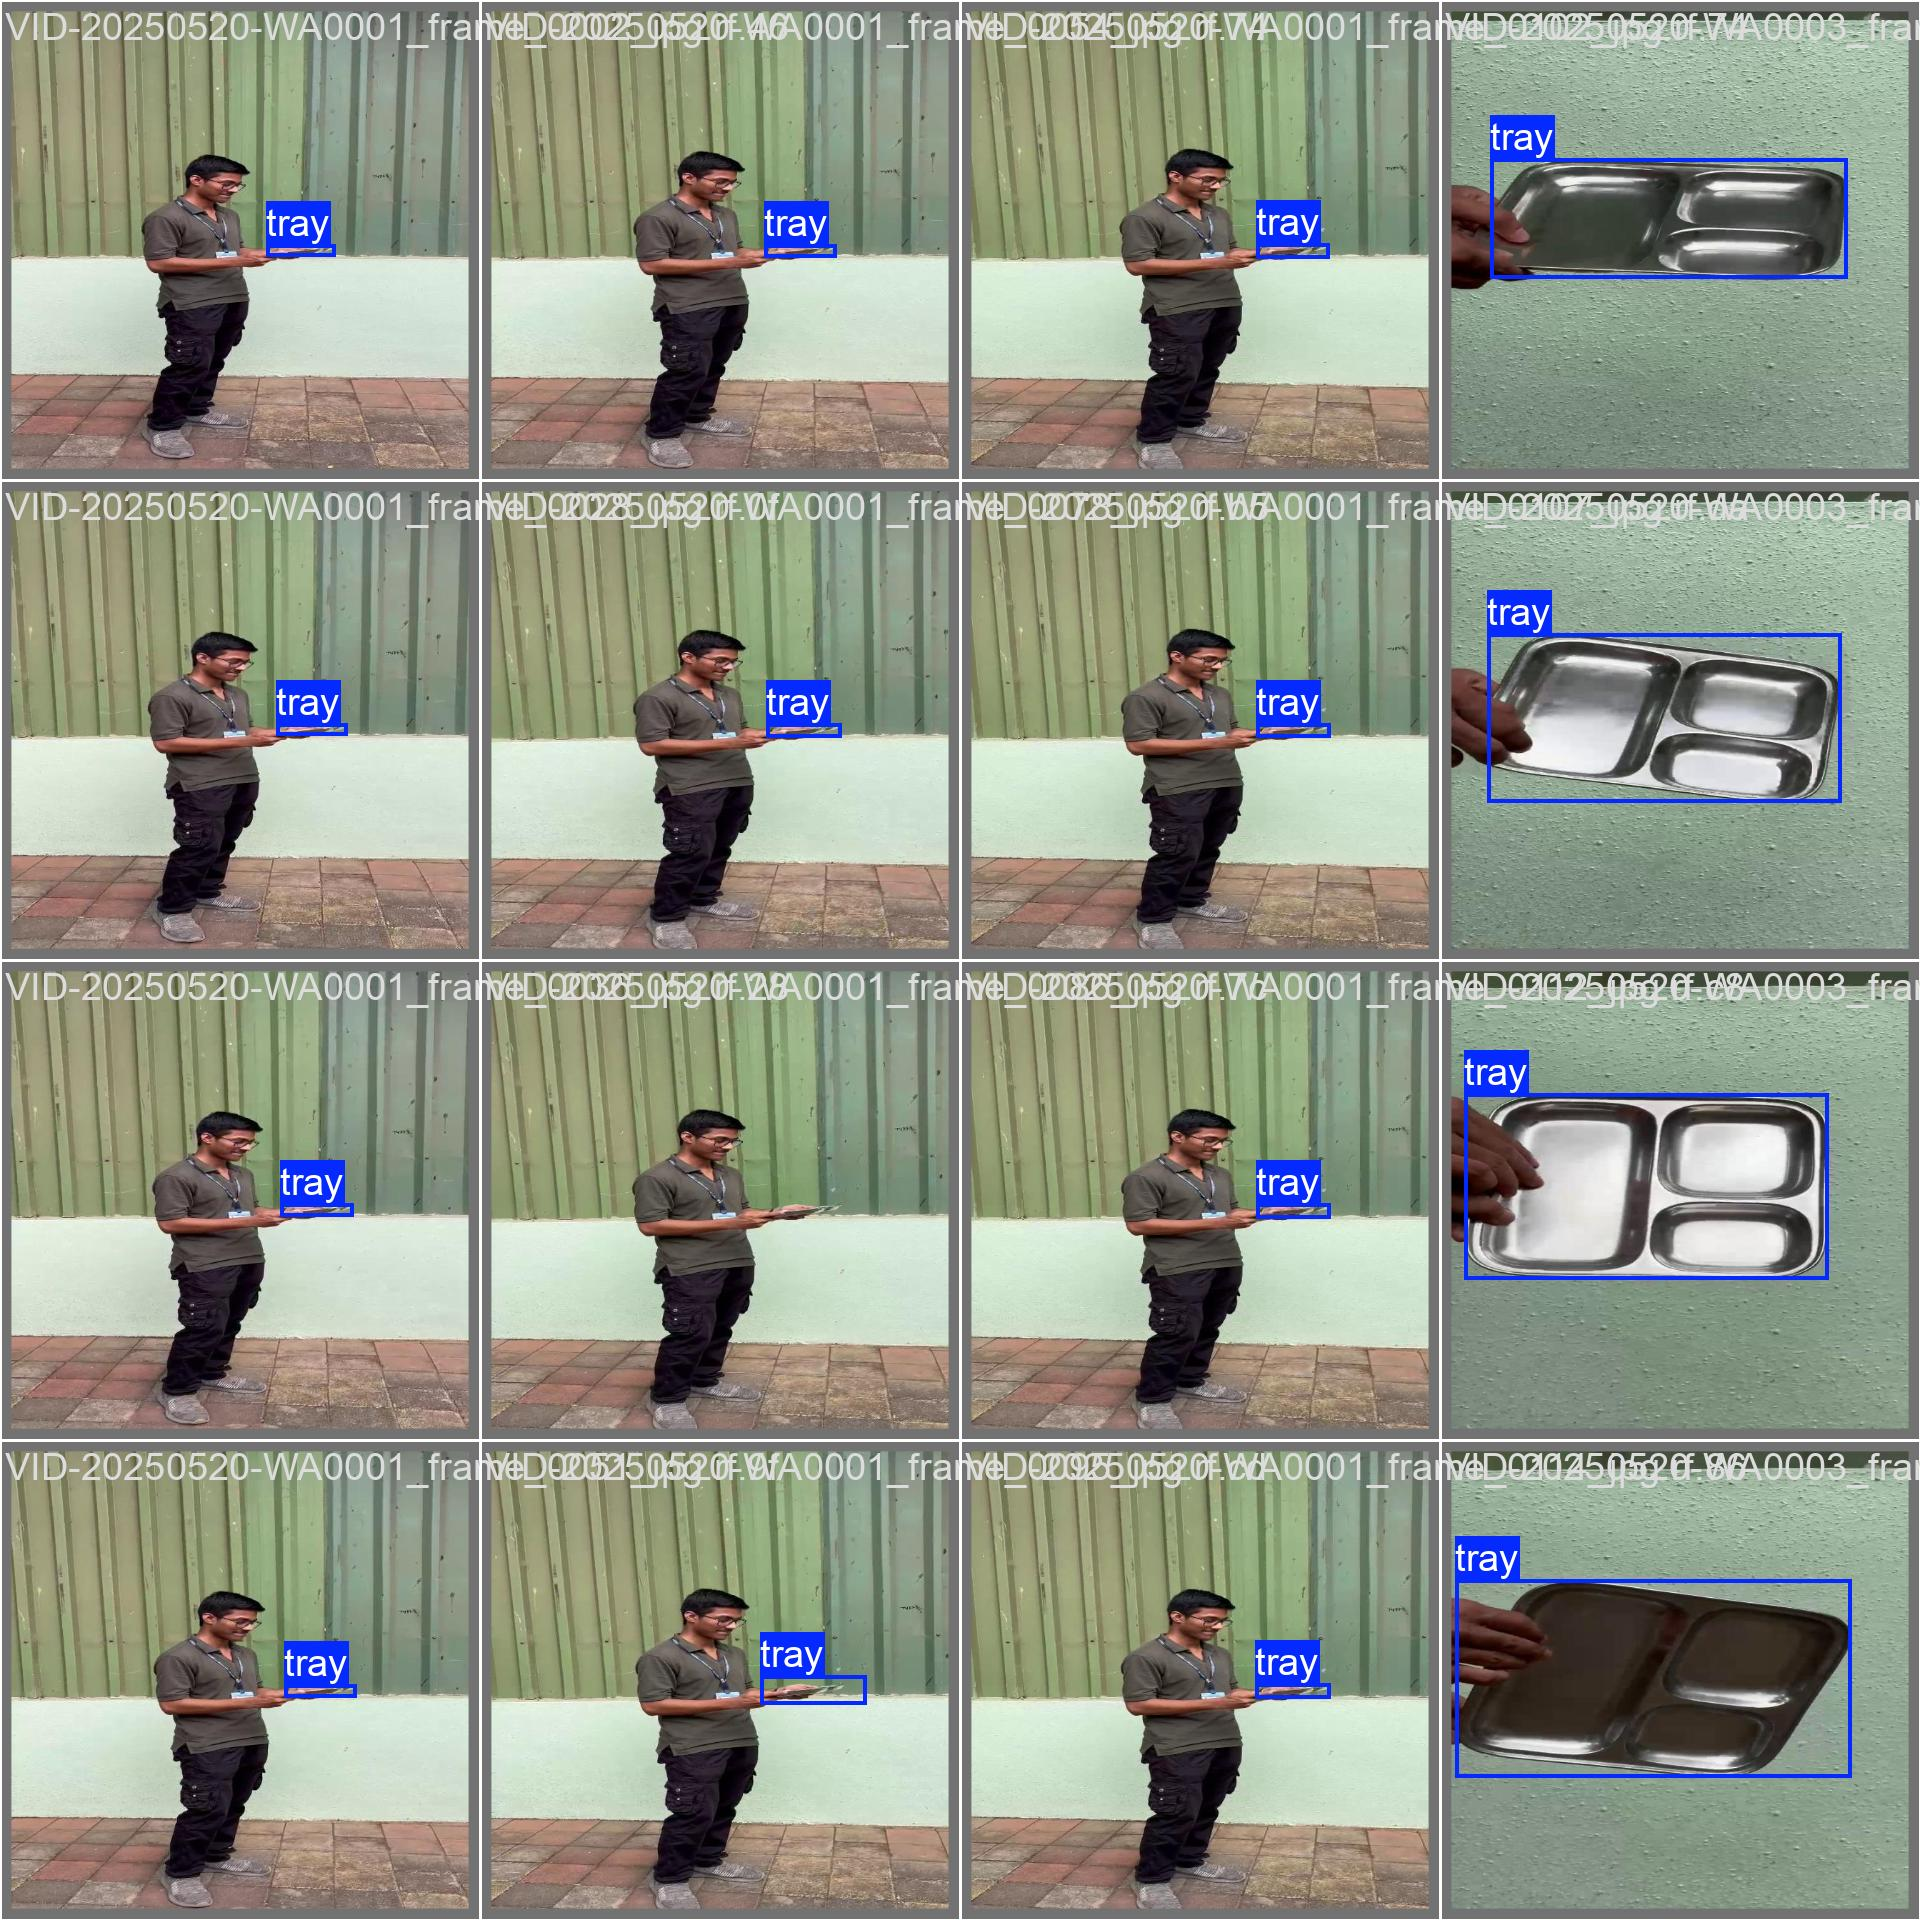

In [ ]:
display(Image('runs/detect/val/val_batch0_labels.jpg'))

In [ ]:
!ls /content/runs/detect/train/weights

In [ ]:
!find tray_training/yolov8n_results -name "*.pt"

tray_training/yolov8n_results/weights/best.pt
tray_training/yolov8n_results/weights/last.pt


In [ ]:
from google.colab import files
files.download('tray_training/yolov8n_results/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>